# 3 - Evaluation

For model evaluation, the we run the evaluation script after a few steps of training to get an idea of the performance of the model . We have selected GPU = 0 for this task. The index of the GPU will be shown as '0' in the output as it starts from 0 and we are using only 1 GPU. The GPU stats are visable using **nvidia-smi** command. The python script will evalute the model and create a new folder called eval inside the model directory with events files that we can run on tensor-board to visualize the graphs. 

The evaluation graphs consist of mean average precision at .50 and .75 IOU, at .50 to .95 IOU with an increment of 0.05 and at different box size (S, M, L) as well. Other than the mAP, we also have the average recall graphs. The AR graphs are plotted @1,10, and hundred detection boxes and at different box sizes as well. A little detail on all these evaluation metrics is below;


**mAP**
* **DetectionBoxes_Precision/mAP:** This graph will show the precion value evaluated for all the images, at all the IOU (0.5, 0.75, [0.5:0.05:0.95]) values and sizes (Small, medium, large) and then averaged.
* **DetectionBoxes_Precision/mAP@.50IOU:** This will show the graph for all images evaluated at 0.50 IOU only.
* **DetectionBoxes_Precision/mAP@.75IOU:** This will show the graph for all images evaluated at 0.75 IOU only.
* **DetectionBoxes_Precision/mAP (large,medium,small):** These graphs are evaluated for the images that have bounding boxes in ranges of small (box area < 32x32 pixels), medium (32x32 pixels < box area < 96x96 pixels) and large (box area > 96x96 pixels) sizes. 


**AR**
* **DetectionBoxes_Recall/AR@1,10,100:** The recall evaluated for images that have **at most** 1, 10, and 100 bounding boxes in them respectively.
* **DetectionBoxes_Recall/AR@100 (small, medium, large):** These are evaluated at various bounding box sizes as explained previously at images with at most 100 boxes.

In [1]:
!nvidia-smi

Mon Jan  2 05:35:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
|  0%   48C    P8    35W / 370W |     29MiB / 24268MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Faster RCNN

In [1]:
PATH_TO_MODEL='Faster_RCNN_ResNet101_1024x1024'

In [2]:
!export CUDA_VISIBLE_DEVICES=0

In [3]:
!python model_main_tf2.py --pipeline_config_path=models/{PATH_TO_MODEL}/pipeline.config --model_dir=models/{PATH_TO_MODEL} --checkpoint_dir=models/{PATH_TO_MODEL} --alsologtostderr

2023-01-02 05:30:00.366221: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
W0102 05:30:01.632552 140078946112320 model_lib_v2.py:1081] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0102 05:30:01.632635 140078946112320 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0102 05:30:01.632675 140078946112320 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0102 05:30:01.632712 140078946112320 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0102 05:30:01.632762 140078946112320 model_lib_v2.py:1099] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2023-01-02 05:30:01.642765: I tensorflow/stream_executor/

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
W0102 05:30:04.127180 140078946112320 deprecation.py:330] From /home/msc1/anaconda3/envs/Object-Detection-API/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206: sparse_to_dense (from tensorflow.python.ops.sparse_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Instructions for updating:
Use `tf.cast` instead.
W0102 05:30:04.720737 140078946112320 deprecation.py:330] From /home/msc1/anaconda3/envs/Object-Detection-API/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py:464: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Waiting for new checkpoint at models/Faster_RCNN_ResNet101_1024x1024
I0102 05:30:06.077967 140078946112320 check

index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.51s).
Accumulating evaluation results...
DONE (t=0.50s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.652
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.911
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.759
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.250
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.527
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.694
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.716
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.753
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.758
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.679
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=mediu

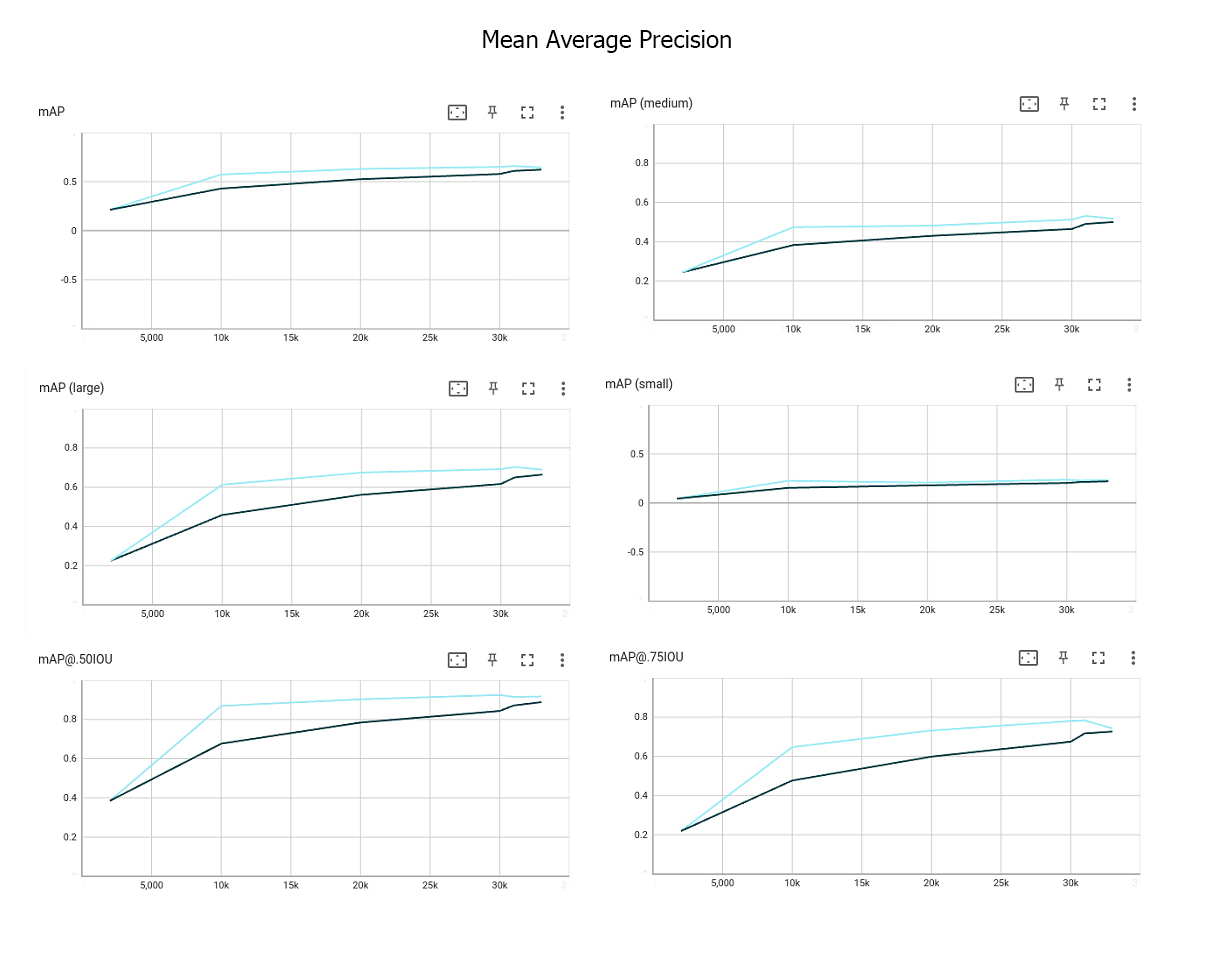

In [5]:
from IPython.display import Image
Image(filename='tensorboard_plots/Faster_RCNN/mAP.jpg')

In the above screenshot, we can see that the mAP [0.5:0.05:0.95]IOU is increasing from 20% to 65% over the increasing steps. 65% is areasonable value of this metric. Similarly we can see good mAPs of 91% and nearly 76% at IOU .50 and IOU .75 respectively. The images with large boxes show decent mAP value as do the medium but the ones with small boxes are at low value of 25%. But this result is expected from the model as there were not a lot of images with small birds to train on. 

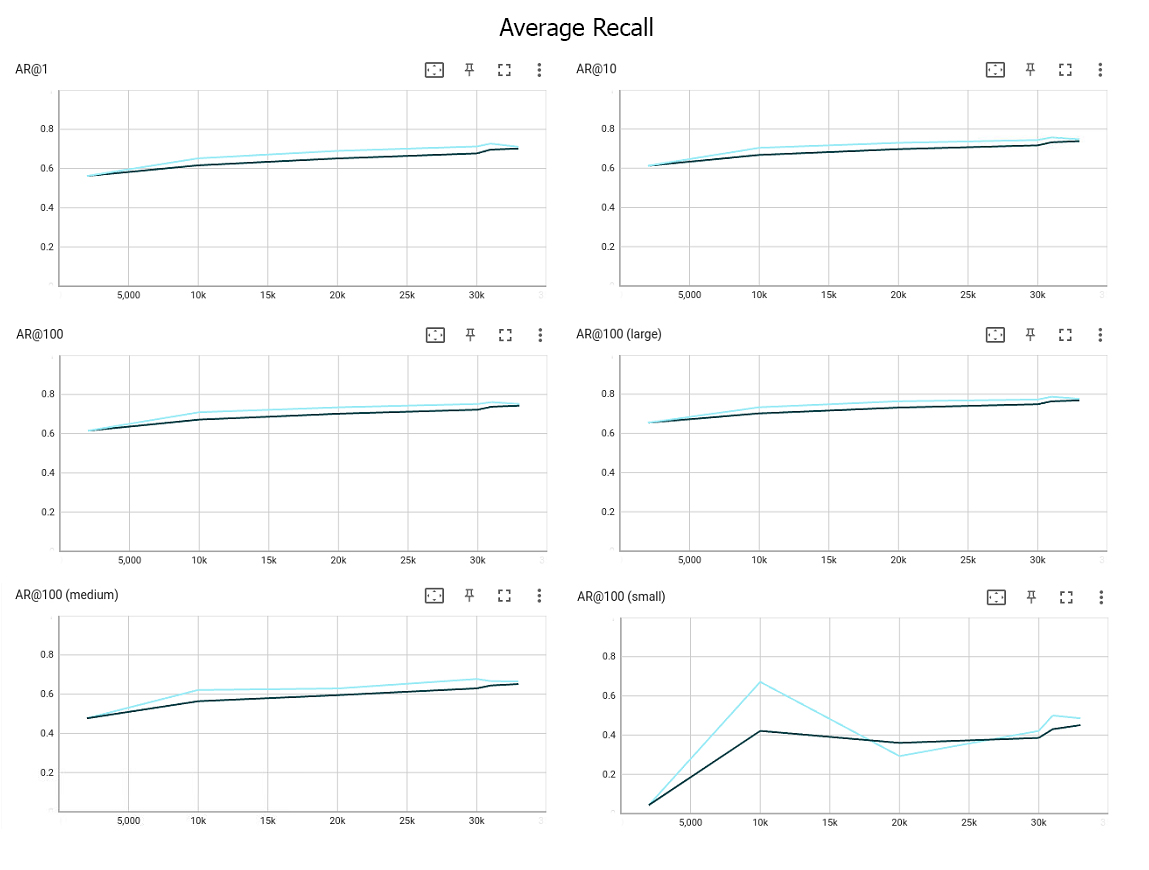

In [6]:
Image(filename='tensorboard_plots/Faster_RCNN/AR.jpg')

Average recall for all the instances is decent, a little lower (50%) in case of @100 (small) but as explained earlier, it is an expected behaviour. An AR of 50% means we have 50:50 ratio of True Positives and False Negatives. For all other cases it is more than 70%. For large images we see a value of 77% which means the ratio of True Positives and False Negatives is 77:23 which is a good value.

## SSD model evaluation

In [ ]:
PATH_TO_MODEL='SSD_ResNet101_1024x1024'

In [2]:
!export CUDA_VISIBLE_DEVICES=0

In [11]:
!python model_main_tf2.py --pipeline_config_path=models/{PATH_TO_MODEL}/pipeline.config --model_dir=models/{PATH_TO_MODEL} --checkpoint_dir=models/{PATH_TO_MODEL} --alsologtostderr

2022-12-22 01:53:33.434793: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
W1222 01:53:34.669543 139871594193280 model_lib_v2.py:1081] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I1222 01:53:34.669625 139871594193280 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1222 01:53:34.669664 139871594193280 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I1222 01:53:34.669700 139871594193280 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W1222 01:53:34.669772 139871594193280 model_lib_v2.py:1099] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2022-12-22 01:53:34.671713: I tensorflow/stream_executor/

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
W1222 01:53:37.191303 139871594193280 deprecation.py:330] From /home/msc1/anaconda3/envs/Object-Detection-API/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206: sparse_to_dense (from tensorflow.python.ops.sparse_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Instructions for updating:
Use `tf.cast` instead.
W1222 01:53:37.731682 139871594193280 deprecation.py:330] From /home/msc1/anaconda3/envs/Object-Detection-API/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py:464: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Waiting for new checkpoint at models/SSD_ResNet101_Aug_Birds_1024x1024
I1222 01:53:39.110280 139871594193280 che

INFO:tensorflow:Finished eval step 2100
I1222 01:56:25.728380 139871594193280 model_lib_v2.py:958] Finished eval step 2100
INFO:tensorflow:Finished eval step 2200
I1222 01:56:32.788830 139871594193280 model_lib_v2.py:958] Finished eval step 2200
INFO:tensorflow:Finished eval step 2300
I1222 01:56:39.840364 139871594193280 model_lib_v2.py:958] Finished eval step 2300
INFO:tensorflow:Finished eval step 2400
I1222 01:56:46.903793 139871594193280 model_lib_v2.py:958] Finished eval step 2400
INFO:tensorflow:Finished eval step 2500
I1222 01:56:54.107935 139871594193280 model_lib_v2.py:958] Finished eval step 2500
INFO:tensorflow:Finished eval step 2600
I1222 01:57:01.114689 139871594193280 model_lib_v2.py:958] Finished eval step 2600
INFO:tensorflow:Finished eval step 2700
I1222 01:57:08.113953 139871594193280 model_lib_v2.py:958] Finished eval step 2700
INFO:tensorflow:Finished eval step 2800
I1222 01:57:15.154601 139871594193280 model_lib_v2.py:958] Finished eval step 2800
INFO:tensorflow:

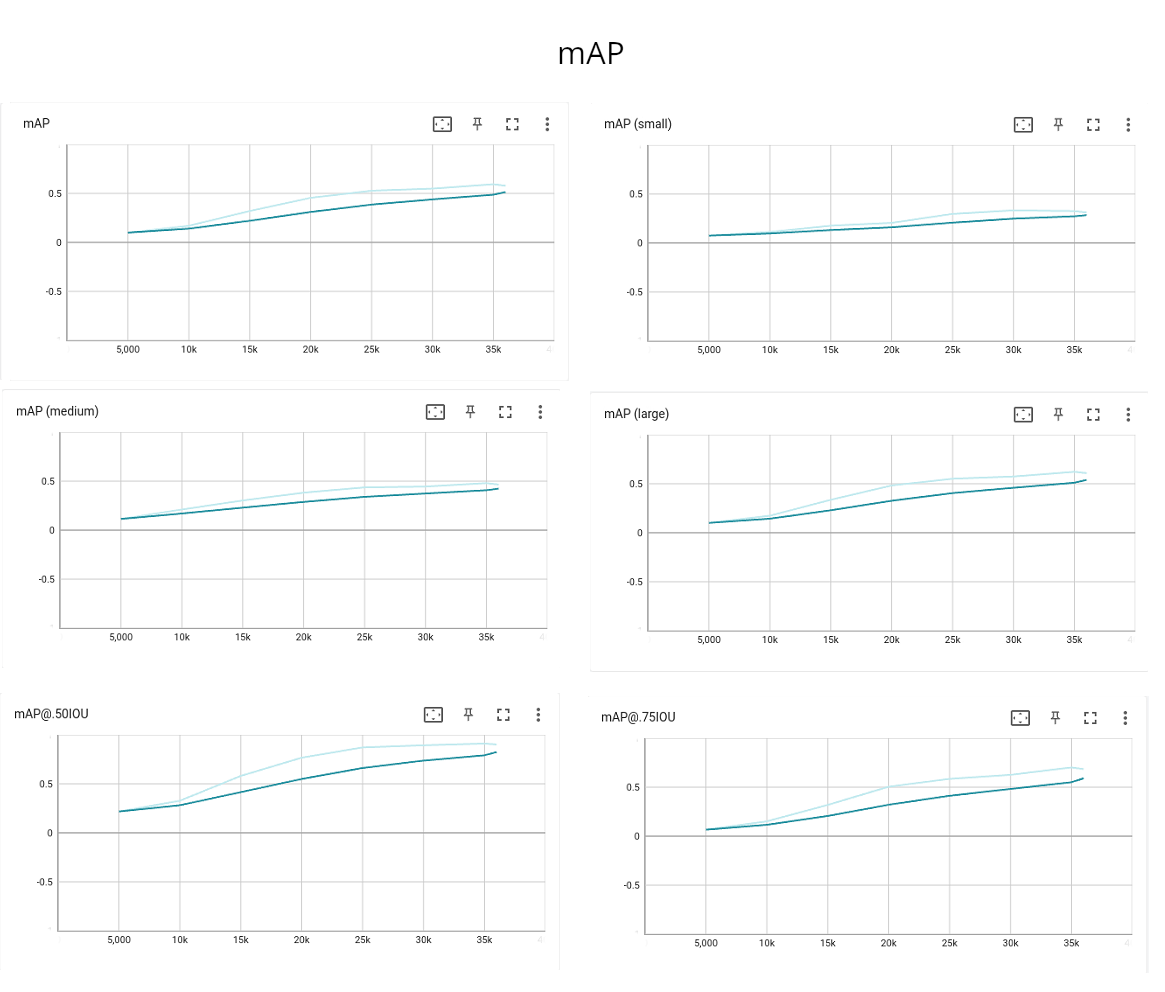

In [11]:
Image(filename='tensorboard_plots/SSD/mAP/mAp_.PNG')

We can observe around 55% mAP at [0.50:0.05:0.95]IOU, 68% @75 IOU, and 90% @ 50 IOU. This means @ 50 IOU, the ratio of True Positive predictions to False Positive is 90 to 10 which is quite good. The values at diffent box sizes are also accpetable.

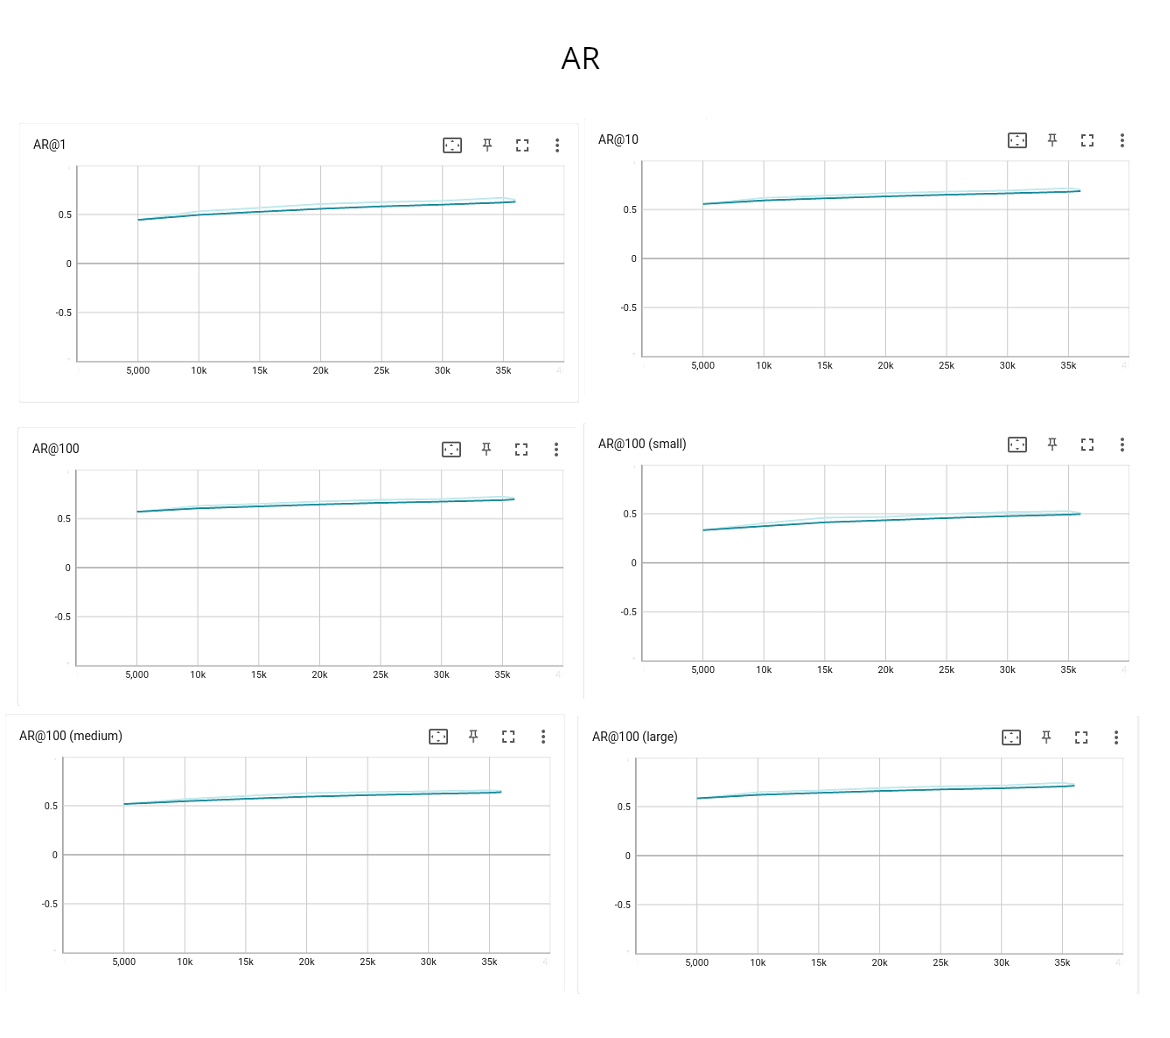

In [13]:
Image(filename='tensorboard_plots/SSD/AR/AR_.PNG')

The Average Recall of the images at medium and large bounding boxes is around 60% @ 100 at most boxes per image.  AR @ 1 and 10 boxes per image is also above 50%. 